<a href="https://colab.research.google.com/github/jiao-xx/travel-dating-analysis/blob/main/statistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Third-Party Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Google Colab-specific
from google.colab import drive


drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/data

/content/drive/MyDrive/data


# Statistical Analysis

In [ ]:
data = pd.read_csv('cleaned_data.csv')
pd.set_option('display.max_columns', None)
data.head()

,userid,used_tinder_during_travels,year_of_most_recent_trip_using_tinder,country_spent_most_time,purpose_of_trip_selected_choice,purpose_of_trip_other_text,number_of_persons_on_trip,who_went_on_trip_selected_choice,who_went_on_trip_organized_group_text,who_went_on_trip_other_text,current_tinder_gold_or_plus_subscriber,type_of_subscription,to_meet_other_travelers,to_meet_locals,to_find_party_companions,to_pass_time,to_make_new_friends,get_accommodation_suggestions_from_locals,get_accommodation_suggestions_from_travelers,get_dining_suggestions_from_locals,get_dining_suggestions_from_travelers,get_activity_suggestions_from_locals,get_activity_suggestions_from_travelers,get_tourist_attraction_suggestions_from_locals,get_tourist_attraction_suggestions_from_travelers,to_find_serious_relationship,to_fall_in_love,to_build_emotional_connection,to_find_one_night_stand,to_increase_sexual_experience,to_enhance_travel_experience,to_make_trip_fun,to_learn_about_destination,to_broaden_experience_at_destination,to_have_satisfying_trip,often_feel_inferior,feel_like_going_to_pieces_when_stressed,often_feel_tense,sometimes_feel_worthless,feel_like_giving_up_when_things_go_wrong,enjoy_talking_to_people,feel_bursting_with_energy,cheerful_high_spirited_person,very_active_person,intrigued_by_art_and_nature,try_new_foreign_foods,little_interest_in_universe_or_human_condition,have_intellectual_curiosity,enjoy_playing_with_theories,get_into_arguments_with_family_or_coworkers,seen_as_selfish_or_egotistical,seen_as_cold_and_calculating,generally_thoughtful_and_considerate,keep_belongings_neat_and_clean,good_at_pacing_to_get_things_done,waste_time_before_settling_to_work,sometimes_not_dependable_or_reliable,never_able_to_get_organized,frequent_binge_drinking,going_camping_in_wild,going_on_safari_in_kenya,going_on_vacation_without_booking_accommodation,traveling_on_commercial_airplane,engaging_in_unprotected_sex,never_using_sunscreen_when_sunbathing,never_wearing_seatbelt,not_having_smoke_alarm,engaging_in_dangerous_sport,primary_residence_in_us_or_canada,zip_or_postal_code_of_primary_residence,country_of_primary_residence,state_or_province_of_primary_residence,sex,age_on_most_recent_birthday,optional_comments_about_tinder_use_during_travels,topics,Regions
0,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,3.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,4.0,4.0,1.0,1.0,2.0,2.0,5.0,3.0,5.0,1.0,5.0,2.0,1.0,1.0,3.0,5.0,5.0,1.0,3.0,1.0,3.0,1.0,False,NaN,JAPAN,NaN,F,23.0,NaN,NaN,East Asia and Pacific
1,1,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,2.0,3.0,3.0,4.0,3.0,2.0,3.0,3.0,3.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,4.0,2.0,1.0,4.0,1.0,3.0,4.0,1.0,2.0,1.0,4.0,2.0,False,NaN,CHINA,GUANGDONG,M,22.0,NaN,NaN,East Asia and Pacific
2,2,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,3.0,5.0,3.0,4.0,3.0,2.0,4.0,4.0,2.0,5.0,3.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,2.0,4.0,2.0,1.0,4.0,1.0,1.0,5.0,1.0,1.0,1.0,3.0,1.0,True,96793,NaN,NaN,M,25.0,"IT’S A DOUBLE EDGED SWORD, FOR WHOEVER YOU’LL ...",NaN,North America
3,3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,3.0,2.0,1.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,3.0,2.0,3.0,1.0,1.0,4.0,3.0,3.0,4.0,3.0,2.0,1.0,4.0,5.0,1.0,3.0,2.0,2.0,1.0,1.0,1.0,True,96792,NaN,NaN,F,25.0,NaN,NaN,North America
4,4,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,3.0,1.0,1.0,4.0,3.0,4.0,3.0,4.0,4.0,1.0,5.0,5.0,1.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,4.0,1.0,3.0,3.0,3.0,5.0,1.0,1.0,4.0,1.0,1.0,True,11367,NaN,NaN,M,24.0,I'VE NEVER CONSIDERED USING TINDER UNDER ANY C...,NaN,North America


## Question 1: Travelers' Motivation to Use Dating Apps

- *What drives travelers to utilize dating apps while on their trips?*

1. We'll filter the dataset for users who have used Tinder (or another dating app if specified) during their travels.


2. We'll examine the columns related to the reasons or motivations behind using the dating app during travels.

In [ ]:
# Filter the dataset for users who have used Tinder during their travels
tinder_users = data[data['used_tinder_during_travels'] == True]

# Display the number of such users and the first few rows of the filtered dataset
num_tinder_users = len(tinder_users)
tinder_users.head(5), num_tinder_users

In [ ]:
# Calculating the average scores for the specific motivations mentioned
motivations = [
    'to_meet_other_travelers', 'to_meet_locals', 'to_find_party_companions', 'to_pass_time',
    'to_make_new_friends', 'get_accommodation_suggestions_from_locals', 'get_accommodation_suggestions_from_travelers',
    'get_dining_suggestions_from_locals', 'get_dining_suggestions_from_travelers', 'get_activity_suggestions_from_locals',
    'get_activity_suggestions_from_travelers', 'get_tourist_attraction_suggestions_from_locals',
    'get_tourist_attraction_suggestions_from_travelers', 'to_find_serious_relationship', 'to_fall_in_love',
    'to_build_emotional_connection', 'to_find_one_night_stand', 'to_increase_sexual_experience',
    'to_enhance_travel_experience', 'to_make_trip_fun', 'to_learn_about_destination',
    'to_broaden_experience_at_destination', 'to_have_satisfying_trip'
]

averages = tinder_users[motivations].mean()

averages_sorted = averages.sort_values(ascending=False)
averages_sorted


to_make_trip_fun                                     5.120181
to_have_satisfying_trip                              4.720358
to_enhance_travel_experience                         4.580717
to_pass_time                                         4.517937
to_broaden_experience_at_destination                 4.407159
to_make_new_friends                                  4.359091
to_meet_locals                                       4.242762
get_activity_suggestions_from_locals                 4.071588
to_learn_about_destination                           3.859729
get_dining_suggestions_from_locals                   3.825503
to_find_party_companions                             3.737079
to_find_one_night_stand                              3.586667
get_tourist_attraction_suggestions_from_locals       3.573034
to_meet_other_travelers                              3.365854
get_activity_suggestions_from_travelers              3.358575
to_increase_sexual_experience                        3.337808
to_build

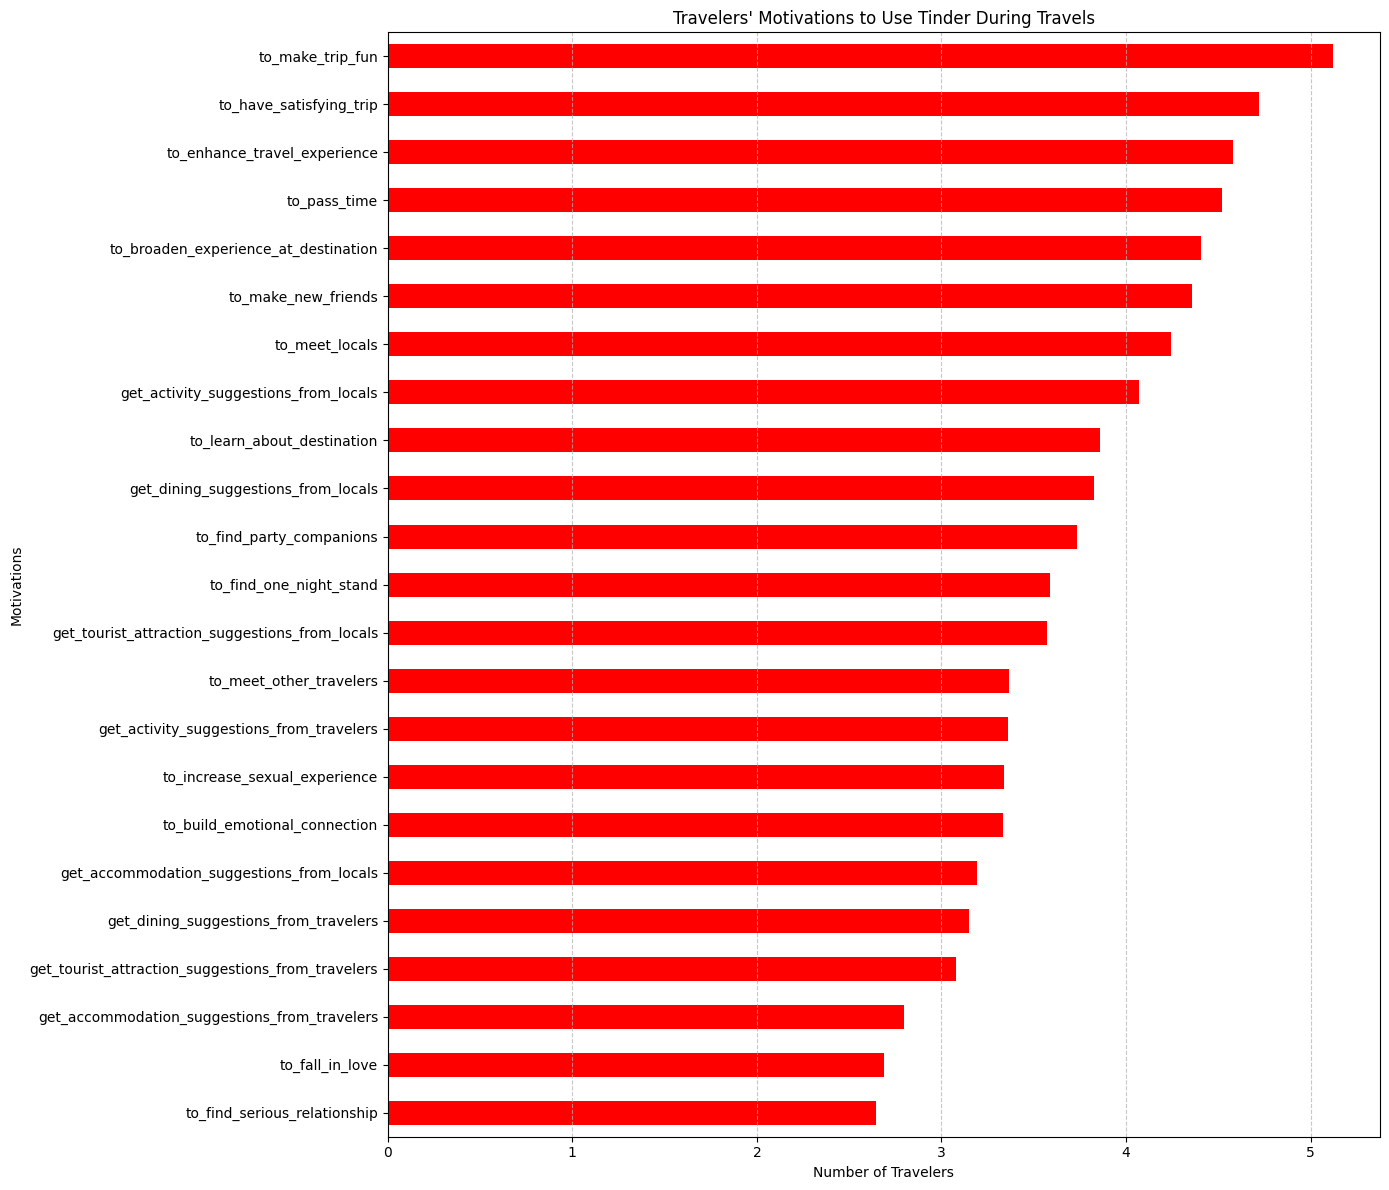

In [ ]:

# Plotting the motivations
plt.figure(figsize=(14,12))
averages_sorted.plot(kind='barh', color='red')
plt.title('Travelers\' Motivations to Use Tinder During Travels')
plt.xlabel('Number of Travelers')
plt.ylabel('Motivations')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Categorizing the motivations based on the factors provided
factors = {
    "Advice Acquisition": [
        "get_accommodation_suggestions_from_locals",
        "get_accommodation_suggestions_from_travelers",
        "get_dining_suggestions_from_locals",
        "get_dining_suggestions_from_travelers",
        "get_activity_suggestions_from_locals",
        "get_activity_suggestions_from_travelers",
        "get_tourist_attraction_suggestions_from_locals",
        "get_tourist_attraction_suggestions_from_travelers"
    ],
    "Trip Enhancement": [
        "to_broaden_experience_at_destination", "to_make_trip_fun",
        "to_enhance_travel_experience", "to_have_satisfying_trip",
        "to_learn_about_destination", "to_meet_locals"
    ],
    "Romance Facilitation": [
        "to_fall_in_love", "to_find_serious_relationship", "to_build_emotional_connection"
    ],
    "Hedonism Facilitation": [
        "to_find_one_night_stand", "to_increase_sexual_experience", "to_find_party_companions"
    ],
    "Diversion": [
        "to_pass_time", "to_meet_other_travelers"
    ]
}

# Calculating the sum of motivations for each factor
factor_counts = {factor: tinder_users[motivations].sum(axis=1).loc[lambda x: x.isin(factors[factor])].sum() for factor in factors}

factor_counts_sorted = dict(sorted(factor_counts.items(), key=lambda item: item[1], reverse=True))
factor_counts_sorted


{'Advice Acquisition': 0.0,
 'Trip Enhancement': 0.0,
 'Romance Facilitation': 0.0,
 'Hedonism Facilitation': 0.0,
 'Diversion': 0.0}

In [ ]:
# Calculating the average score for each factor category
factor_averages = {factor: tinder_users[factors[factor]].mean(axis=1).mean() for factor in factors}

factor_averages_sorted = dict(sorted(factor_averages.items(), key=lambda item: item[1], reverse=True))
factor_averages_sorted


{'Trip Enhancement': 4.493643754619365,
 'Diversion': 3.9412416851441243,
 'Hedonism Facilitation': 3.5602365114560235,
 'Advice Acquisition': 3.3778313316477035,
 'Romance Facilitation': 2.8796296296296298}

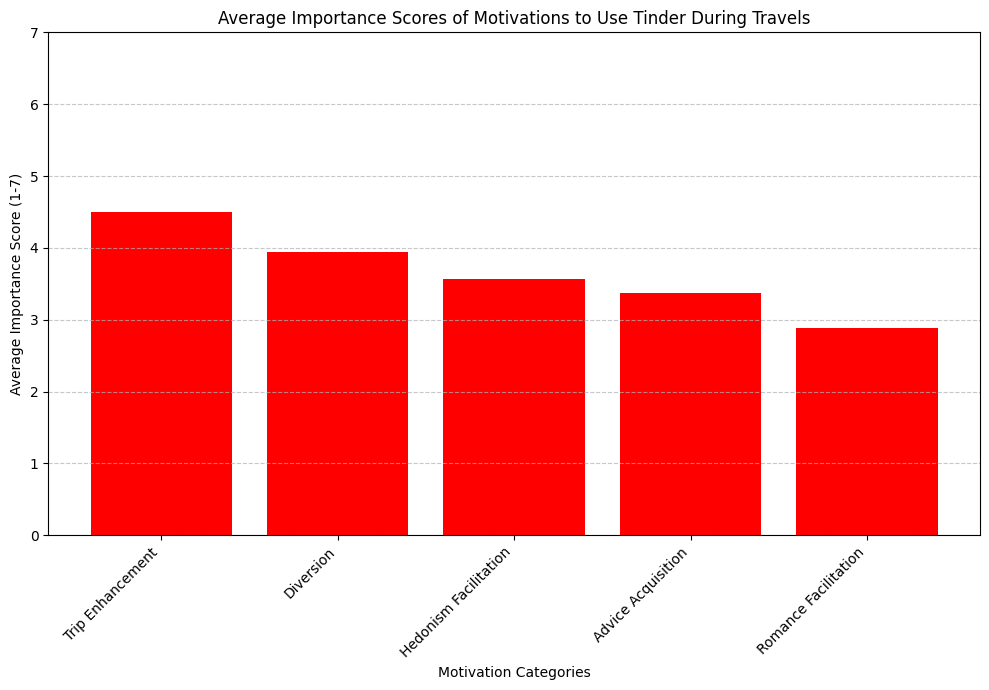

In [ ]:
# Plotting the average importance scores for each factor
plt.figure(figsize=(10,7))
plt.bar(factor_averages_sorted.keys(), factor_averages_sorted.values(), color='red')
plt.title('Average Importance Scores of Motivations to Use Tinder During Travels')
plt.ylabel('Average Importance Score (1-7)')
plt.xlabel('Motivation Categories')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Question 2: Impact of Dating Apps on Travel Experience

- *Where do people use the application?*

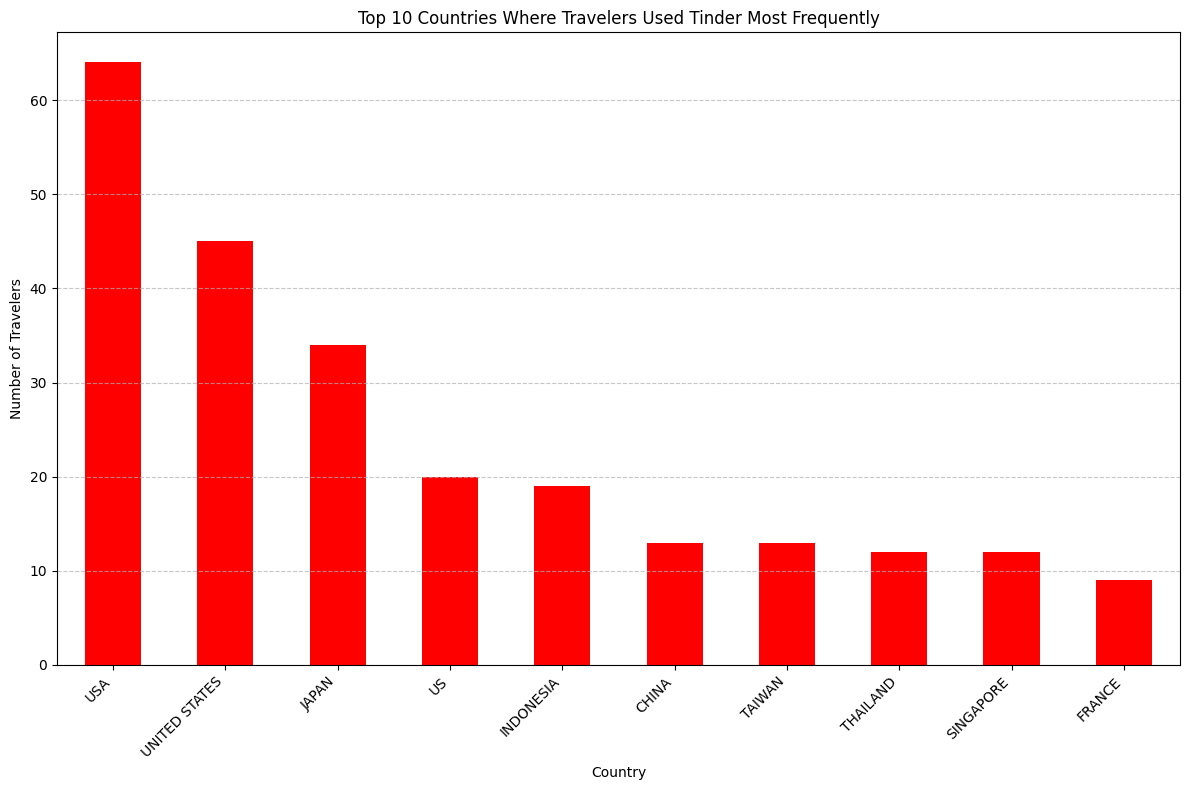

In [ ]:
# Analyzing the distribution of countries where travelers used Tinder
country_distribution = tinder_users['country_spent_most_time'].value_counts().head(10)

# Plotting the top 10 countries where travelers are most likely to use Tinder
plt.figure(figsize=(12,8))
country_distribution.plot(kind='bar', color='red')
plt.title('Top 10 Countries Where Travelers Used Tinder Most Frequently')
plt.ylabel('Number of Travelers')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Question 3: Influence of Travel Purpose on Dating App Usage

*How does the intent or goal of travel influence the usage of dating apps?*

- Extract the distribution of travel purposes among those who used dating apps and those who didn't.
- Visualize the data to understand the relationship between travel purpose and dating app usage.
- Perform a statistical test (e.g., Chi-square test for independence) to determine if the observed differences are statistically significant.

In [ ]:
# Creating the contingency table
contingency_table = pd.crosstab(data['purpose_of_trip_selected_choice'], data['used_tinder_during_travels'])

contingency_table

used_tinder_during_travels,True
purpose_of_trip_selected_choice,
BUSINESS,95
OTHER; PLEASE SPECIFY:,54
VACATION,227
VISIT FRIENDS / RELATIVES,72


In [ ]:
# Filter the dataset for users who have used Tinder during their travels
tinder_users = data[data['used_tinder_during_travels'] == True]

# Extracting the distribution of travel purposes among Tinder users and non-Tinder users
tinder_travel_purpose = tinder_users['purpose_of_trip_selected_choice'].value_counts(normalize=True)
non_tinder_travel_purpose = data[data['used_tinder_during_travels'] == False]['purpose_of_trip_selected_choice'].value_counts(normalize=True)

# Combining the distributions into a single DataFrame for easier comparison
travel_purpose_df = pd.DataFrame({
    'Used Tinder': tinder_travel_purpose,
    'Did not use Tinder': non_tinder_travel_purpose
}).fillna(0)

# Percentage
travel_purpose_df = travel_purpose_df*100

# Sorting the DataFrame in descending order based on the 'Used Tinder' column
sorted_travel_purpose_df = travel_purpose_df.sort_values(by='Used Tinder', ascending=False)
sorted_travel_purpose_df


,Used Tinder,Did not use Tinder
VACATION,50.669643,0.0
BUSINESS,21.205357,0.0
VISIT FRIENDS / RELATIVES,16.071429,0.0
OTHER; PLEASE SPECIFY:,12.053571,0.0


<Figure size 1200x700 with 0 Axes>

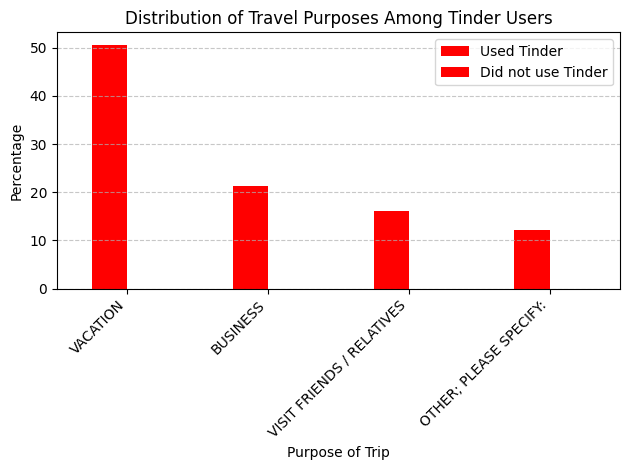

In [ ]:
# Visualizing the distribution of travel purposes among Tinder users
plt.figure(figsize=(12,7))
sorted_travel_purpose_df.plot(kind='bar', color='red')
plt.title('Distribution of Travel Purposes Among Tinder Users')
plt.ylabel('Percentage')
plt.xlabel('Purpose of Trip')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Question 4: Personality's Role in Dating App Usage
*How does the personality of a traveler affect their decision to employ dating apps during their journeys?*

- Aggregate Scores: For each personality trait, we can compute an aggregate score by summing the scores of the associated questions. This will give us a continuous measure for each trait.
- T-tests: We can perform independent sample t-tests to compare the mean scores of each personality trait between those who used dating apps and those who didn't.
- Visualization: We can visualize the mean scores of each trait for both groups (those who used dating apps and those who didn't) to aid in interpretation.

In [ ]:
# Creating aggregate scores for each personality trait
personality_traits = {
    'Neuroticism': [
        'often_feel_inferior', 'feel_like_going_to_pieces_when_stressed',
        'often_feel_tense', 'sometimes_feel_worthless', 'feel_like_giving_up_when_things_go_wrong'
    ],
    'Extraversion': [
        'enjoy_talking_to_people', 'feel_bursting_with_energy',
        'cheerful_high_spirited_person', 'very_active_person'
    ],
    'Openness': [
        'intrigued_by_art_and_nature', 'try_new_foreign_foods',
        'little_interest_in_universe_or_human_condition', 'have_intellectual_curiosity', 'enjoy_playing_with_theories'
    ],
    'Agreeableness': [
        'get_into_arguments_with_family_or_coworkers', 'seen_as_selfish_or_egotistical',
        'seen_as_cold_and_calculating', 'generally_thoughtful_and_considerate'
    ],
    'Conscientiousness': [
        'keep_belongings_neat_and_clean', 'good_at_pacing_to_get_things_done',
        'waste_time_before_settling_to_work', 'sometimes_not_dependable_or_reliable', 'never_able_to_get_organized'
    ]
}

# Calculating the aggregate scores for each trait
for trait, columns in personality_traits.items():
    data[trait] = data[columns].sum(axis=1)

# Extracting the aggregate scores for further analysis
aggregate_scores = data[['used_tinder_during_travels'] + list(personality_traits.keys())]

aggregate_scores.head()


,used_tinder_during_travels,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness
0,False,20.0,11.0,19.0,10.0,16.0
1,False,13.0,12.0,14.0,10.0,15.0
2,False,19.0,13.0,18.0,15.0,15.0
3,False,12.0,15.0,16.0,9.0,15.0
4,False,10.0,14.0,19.0,11.0,18.0


Perform independent sample t-tests for each trait to compare the mean scores between travelers who used dating apps and those who didn't. This will help us determine if there's a statistically significant difference in the scores for each trait between the two groups.

In [ ]:
# Perform t-tests for each trait
ttest_results = {}

for trait in personality_traits.keys():
    tinder_group = aggregate_scores[aggregate_scores['used_tinder_during_travels'] == True][trait]
    non_tinder_group = aggregate_scores[aggregate_scores['used_tinder_during_travels'] == False][trait]

    t_stat, p_val = ttest_ind(tinder_group, non_tinder_group)
    ttest_results[trait] = {'t_stat': t_stat, 'p_val': p_val}

ttest_results_df = pd.DataFrame(ttest_results).transpose()

ttest_results_df


,t_stat,p_val
Neuroticism,-4.048206,0.000056
Extraversion,2.643530,0.008361
Openness,1.824130,0.068495
Agreeableness,0.520667,0.602739
Conscientiousness,-0.049017,0.960918


## Question 5: Risk Tolerance and Dating App Usage

- *How does a traveler's willingness to take risks influence their decision to use dating apps while traveling?*

In [ ]:
# Check for missing values in the relevant columns
missing_values = data[['used_tinder_during_travels', 'frequent_binge_drinking', 'going_camping_in_wild',
                       'going_on_safari_in_kenya', 'going_on_vacation_without_booking_accommodation',
                       'traveling_on_commercial_airplane', 'engaging_in_unprotected_sex',
                       'never_using_sunscreen_when_sunbathing', 'never_wearing_seatbelt',
                       'not_having_smoke_alarm', 'engaging_in_dangerous_sport']].isnull().sum()

# Check the distribution of the dependent variable
tinder_usage_distribution = data['used_tinder_during_travels'].value_counts()

missing_values, tinder_usage_distribution


(used_tinder_during_travels                          0
 frequent_binge_drinking                            21
 going_camping_in_wild                              23
 going_on_safari_in_kenya                           28
 going_on_vacation_without_booking_accommodation    23
 traveling_on_commercial_airplane                   30
 engaging_in_unprotected_sex                        26
 never_using_sunscreen_when_sunbathing              24
 never_wearing_seatbelt                             27
 not_having_smoke_alarm                             25
 engaging_in_dangerous_sport                        20
 dtype: int64,
 True     459
 False    365
 Name: used_tinder_during_travels, dtype: int64)

In [ ]:
# Drop rows with missing values in the relevant columns
data_clean = data.dropna(subset=['frequent_binge_drinking', 'going_camping_in_wild',
                                 'going_on_safari_in_kenya', 'going_on_vacation_without_booking_accommodation',
                                 'traveling_on_commercial_airplane', 'engaging_in_unprotected_sex',
                                 'never_using_sunscreen_when_sunbathing', 'never_wearing_seatbelt',
                                 'not_having_smoke_alarm', 'engaging_in_dangerous_sport'])

# Independent variables
X = data_clean[['frequent_binge_drinking', 'going_camping_in_wild',
                'going_on_safari_in_kenya', 'going_on_vacation_without_booking_accommodation',
                'traveling_on_commercial_airplane', 'engaging_in_unprotected_sex',
                'never_using_sunscreen_when_sunbathing', 'never_wearing_seatbelt',
                'not_having_smoke_alarm', 'engaging_in_dangerous_sport']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Dependent variable
y = data_clean['used_tinder_during_travels']

# Fit logistic regression model
logit_model = sm.Logit(y, X).fit()


Optimization terminated successfully.
         Current function value: 0.634849
         Iterations 5


In [ ]:
# Display the summary of the logistic regression model
logit_summary = logit_model.summary()
logit_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     used_tinder_during_travels   No. Observations:                  766
Model:                                  Logit   Df Residuals:                      755
Method:                                   MLE   Df Model:                           10
Date:                        Wed, 09 Aug 2023   Pseudo R-squ.:                 0.07568
Time:                                00:54:51   Log-Likelihood:                -486.29
converged:                               True   LL-Null:                       -526.11
Covariance Type:                    nonrobust   LLR p-value:                 5.912e-13
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              -1.3002      0.432     -3.011      0.003      -2.146      -0.454
frequent_binge_drinking                             0.3378      0.061      5.538      0.000       0.218       0.457
going_camping_in_wild                               0.0848      0.062      1.378      0.168      -0.036       0.205
going_on_safari_in_kenya                            0.0577      0.061      0.942      0.346      -0.062       0.178
going_on_vacation_without_booking_accommodation     0.0547      0.053      1.034      0.301      -0.049       0.158
traveling_on_commercial_airplane                   -0.0444      0.084     -0.529      0.597      -0.209       0.120
engaging_in_unprotected_sex                         0.0093      0.060      0.156      0.876      -0.108       0.126
never_using_sunscreen_when_sunbathing               0.0550      0.056      0.975      0.330      -0.056       0.166
never_wearing_seatbelt                             -0.0959      0.077     -1.239      0.215      -0.248       0.056
not_having_smoke_alarm                             -0.0342      0.059     -0.577      0.564      -0.150       0.082
engaging_in_dangerous_sport                         0.1655      0.057      2.883      0.004       0.053       0.278
===================================================================================================================
"""

In [ ]:
# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model
log_reg.fit(X, y)

# Predictions
y_pred = log_reg.predict(X)

# Model accuracy
accuracy = accuracy_score(y, y_pred)

# Classification report
class_report = classification_report(y, y_pred)

coef = log_reg.coef_
intercept = log_reg.intercept_

accuracy, coef, intercept, class_report


(0.6370757180156658,
 array([[ 0.00037916,  0.33662311,  0.08472477,  0.05758253,  0.05467527,
         -0.04379557,  0.00963673,  0.05477917, -0.09510383, -0.0340132 ,
          0.16518915]]),
 array([-1.30097507]),
 '              precision    recall  f1-score   support\n\n       False       0.60      0.56      0.58       340\n        True       0.66      0.70      0.68       426\n\n    accuracy                           0.64       766\n   macro avg       0.63      0.63      0.63       766\nweighted avg       0.63      0.64      0.64       766\n')



1. **Model Accuracy**: The model has an accuracy of approximately \(63.71\%\).
2. **Coefficients**:
   - The coefficients for each of the risk-taking behaviors are provided in the array. The order corresponds to the order of the predictors used in the model.
3. **Intercept**: The intercept of the logistic regression model is approximately \(-1.30097507\).
4. **Classification Report**: This provides metrics like precision, recall, and the f1-score for both classes (True: used Tinder during travels, False: did not use Tinder during travels).

From the classification report, we can observe:
- For the `True` class (used Tinder during travels):
  - **Precision**: \(66\%\)
  - **Recall**: \(70\%\)
  - **F1-Score**: \(68\%\)
- For the `False` class (did not use Tinder during travels):
  - **Precision**: \(60\%\)
  - **Recall**: \(56\%\)
  - **F1-Score**: \(58\%\)


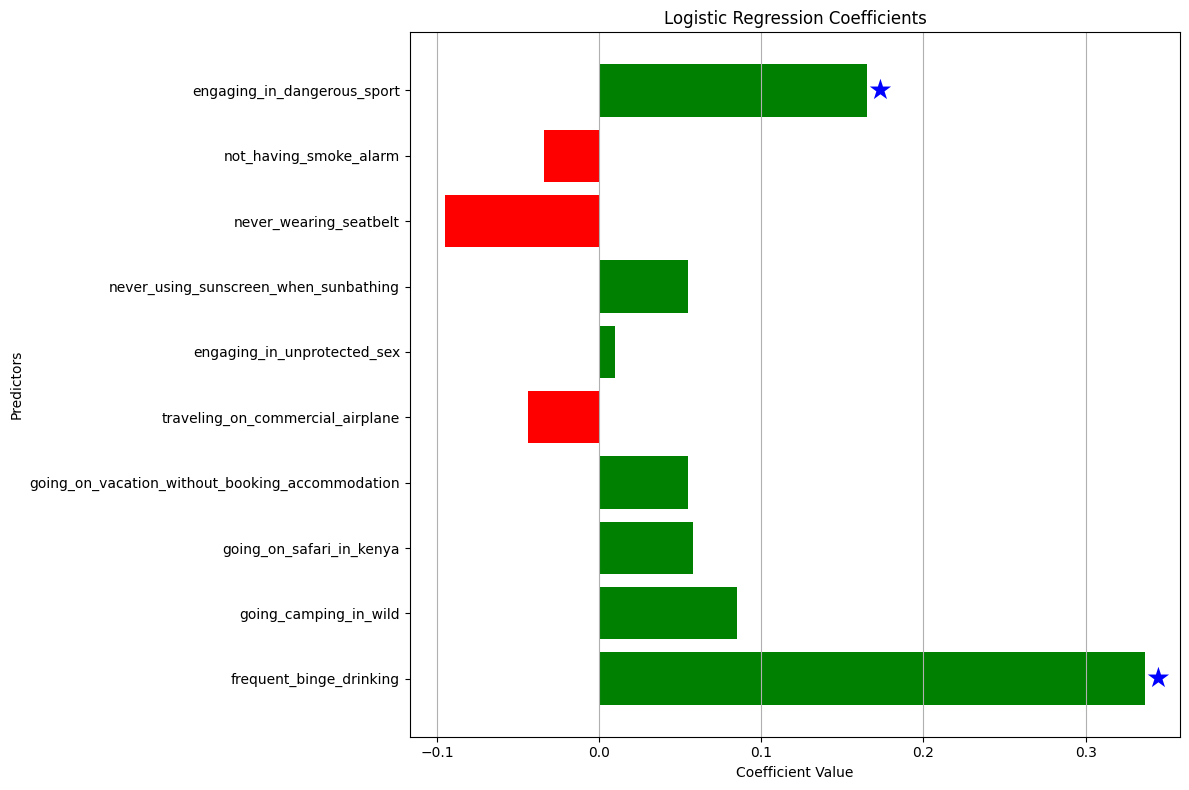

In [ ]:
# Extract coefficients
coefficients = log_reg.coef_[0][1:]  # Exclude intercept
predictors = X.columns[1:]  # Exclude constant

# Create bar plot
plt.figure(figsize=(12, 8))
plt.barh(predictors, coefficients, color=np.where(coefficients > 0, 'green', 'red'))
plt.xlabel('Coefficient Value')
plt.ylabel('Predictors')
plt.title('Logistic Regression Coefficients')
plt.grid(axis='x')

# Highlight significant coefficients based on previous analysis
significant_predictors = ['frequent_binge_drinking', 'engaging_in_dangerous_sport']
for predictor in significant_predictors:
    index = list(predictors).index(predictor)
    plt.text(coefficients[index], index, '★', va='center', color='blue', fontsize=20)

plt.tight_layout()
plt.show()
